<a href="https://colab.research.google.com/github/Stuteee/ML_Task1/blob/main/ML_Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


We first start by importing the necessary libraries for data preprocessing and visualization

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

We store the csv file in a variable called df making it easier to read the file

In [3]:
df = pd.read_csv('/content/drive/MyDrive/ML Week 1/Copy of automobile_data.csv')

Next we read the top 5 rows of the table to check if the file has been imported correctly

In [4]:
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


Now that the file has been imported correctly, we start with the process of data cleaning. The first step is of checking for duplicated values in a dataset.

In [5]:
df.duplicated().sum()

0

There are no duplicated values in the dataset, but as per the first 5 rows printed, there are '?' in the dataset which can be replaced by NaN values

In [6]:
df.replace('?', np.NaN, inplace = True)

Now, we check if the '?' has been replaced with null/NaN values by printing the first 5 rows

In [7]:
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


The normalized losses column shows how the '?' has been replaced with NaN. So, now we check the null values in the dataset

In [8]:
df.isnull().sum()

,0
symboling,0
normalized-losses,41
make,0
fuel-type,0
aspiration,0
num-of-doors,2
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0


We, next check the percentage of null values in the dataset to clean the dataset.

In [9]:
def get_null_percentages(df, columns):
    result = {}
    for col in columns:
        if col in df.columns:
            null_count = df[col].isnull().sum()
            total_count = len(df)
            null_percentage = (null_count / total_count) * 100
            result[col] = round(null_percentage, 2)
        else:
            result[col] = "Column not found"

    return result

columns_to_check = ['price','peak-rpm','horsepower','stroke','bore','num-of-doors','normalized-losses']
null_percentages = get_null_percentages(df, columns_to_check)

# Display the results properly
for column, percentage in null_percentages.items():
    if isinstance(percentage, float):
        print(f"{column}: {percentage}%")
    else:
        print(f"{column}: {percentage}")

price: 1.95%
peak-rpm: 0.98%
horsepower: 0.98%
stroke: 1.95%
bore: 1.95%
num-of-doors: 0.98%
normalized-losses: 20.0%


Now, as per the percentages of missing values, we can drop rows containing missing values less than 5 percent.

In [10]:
df.dropna(subset=['price','peak-rpm','horsepower','stroke','bore','num-of-doors'], inplace=True)

We first convert the column of normalized-losses to integer format so that we can implement additions

In [11]:
df['normalized-losses'] = pd.to_numeric(df['normalized-losses'], errors='coerce')

Next, we check the distribution of normalized losses in the datset by plotting a histogram

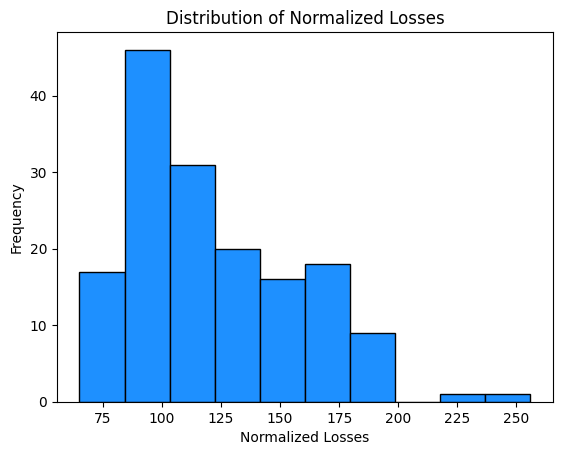

In [12]:
plt.hist(df['normalized-losses'], bins=10, edgecolor='black', color='dodgerblue') # notice how we are binning data here
plt.title('Distribution of Normalized Losses')
plt.xlabel('Normalized Losses')
plt.ylabel('Frequency')
plt.show()

As, we see the data is skewed, we use median to fill the missing values in the dataset

In [13]:
df['normalized-losses'].fillna(df['normalized-losses'].median(), inplace=True)

Now, we see if there are any null values in the dataset in general also

In [14]:
df.isnull().sum()

,0
symboling,0
normalized-losses,0
make,0
fuel-type,0
aspiration,0
num-of-doors,0
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0


Next, we convert our column 'num-of-doors' column to integer format so that we can easily plot graphs for the same. But before, we check for the different types in the column

In [15]:
df['num-of-doors'].value_counts()

,count
num-of-doors,
four,112
two,81


There are just two types, so we map them to integer values

In [16]:
door_mapping = {
    'four': 4,
    'two': 2
}

df['num-of-doors'] = df['num-of-doors'].map(door_mapping)

Next, we do the same for 'num-of-cylinders' column to make it easier for plotting graphs. But before, check for different tpes present

In [17]:
df['num-of-cylinders'].value_counts()

,count
num-of-cylinders,
four,153
six,24
five,10
eight,4
three,1
twelve,1


Now, we map accordingly

In [18]:
cyl_mapping = {
    'six': 6,
    'eight': 8,
    'five': 5,
    'four': 4,
    'twelve': 12,
    'three': 3
}

df['num-of-cylinders'] = df['num-of-cylinders'].map(cyl_mapping)

We convert the price to float as its data type initially is object which cannot be used for visualizations

In [19]:
df['price'] = df['price'].astype(float)

Now, we move to the part of visualizations, to see correlations between the different variables and the target variable 'price'. We first plot a correlation heatmap for all the numeric variables

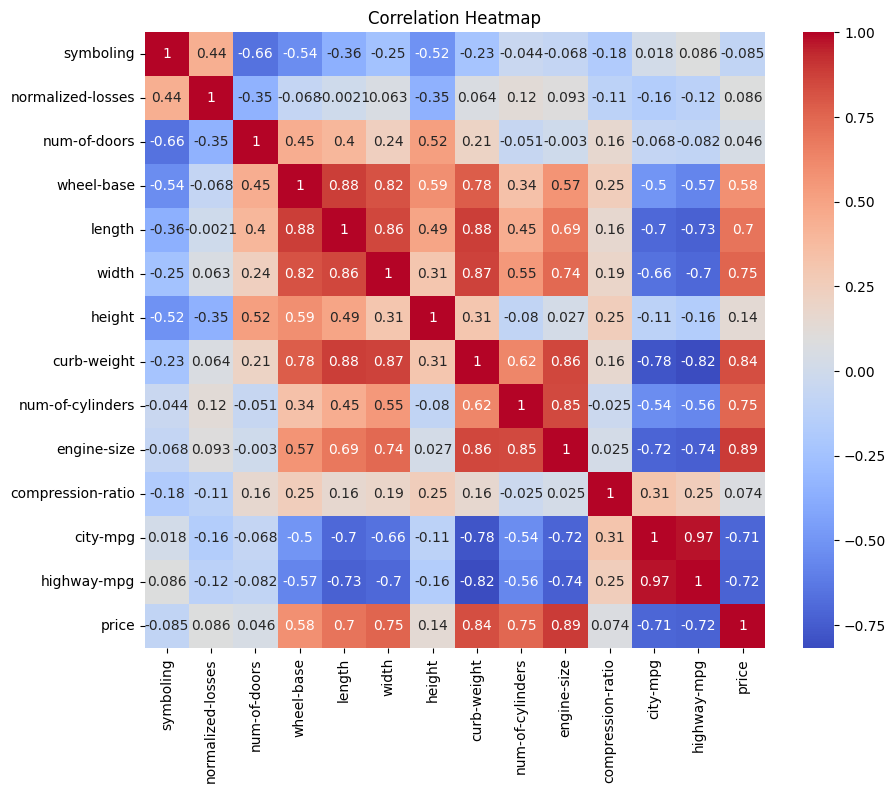

In [20]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

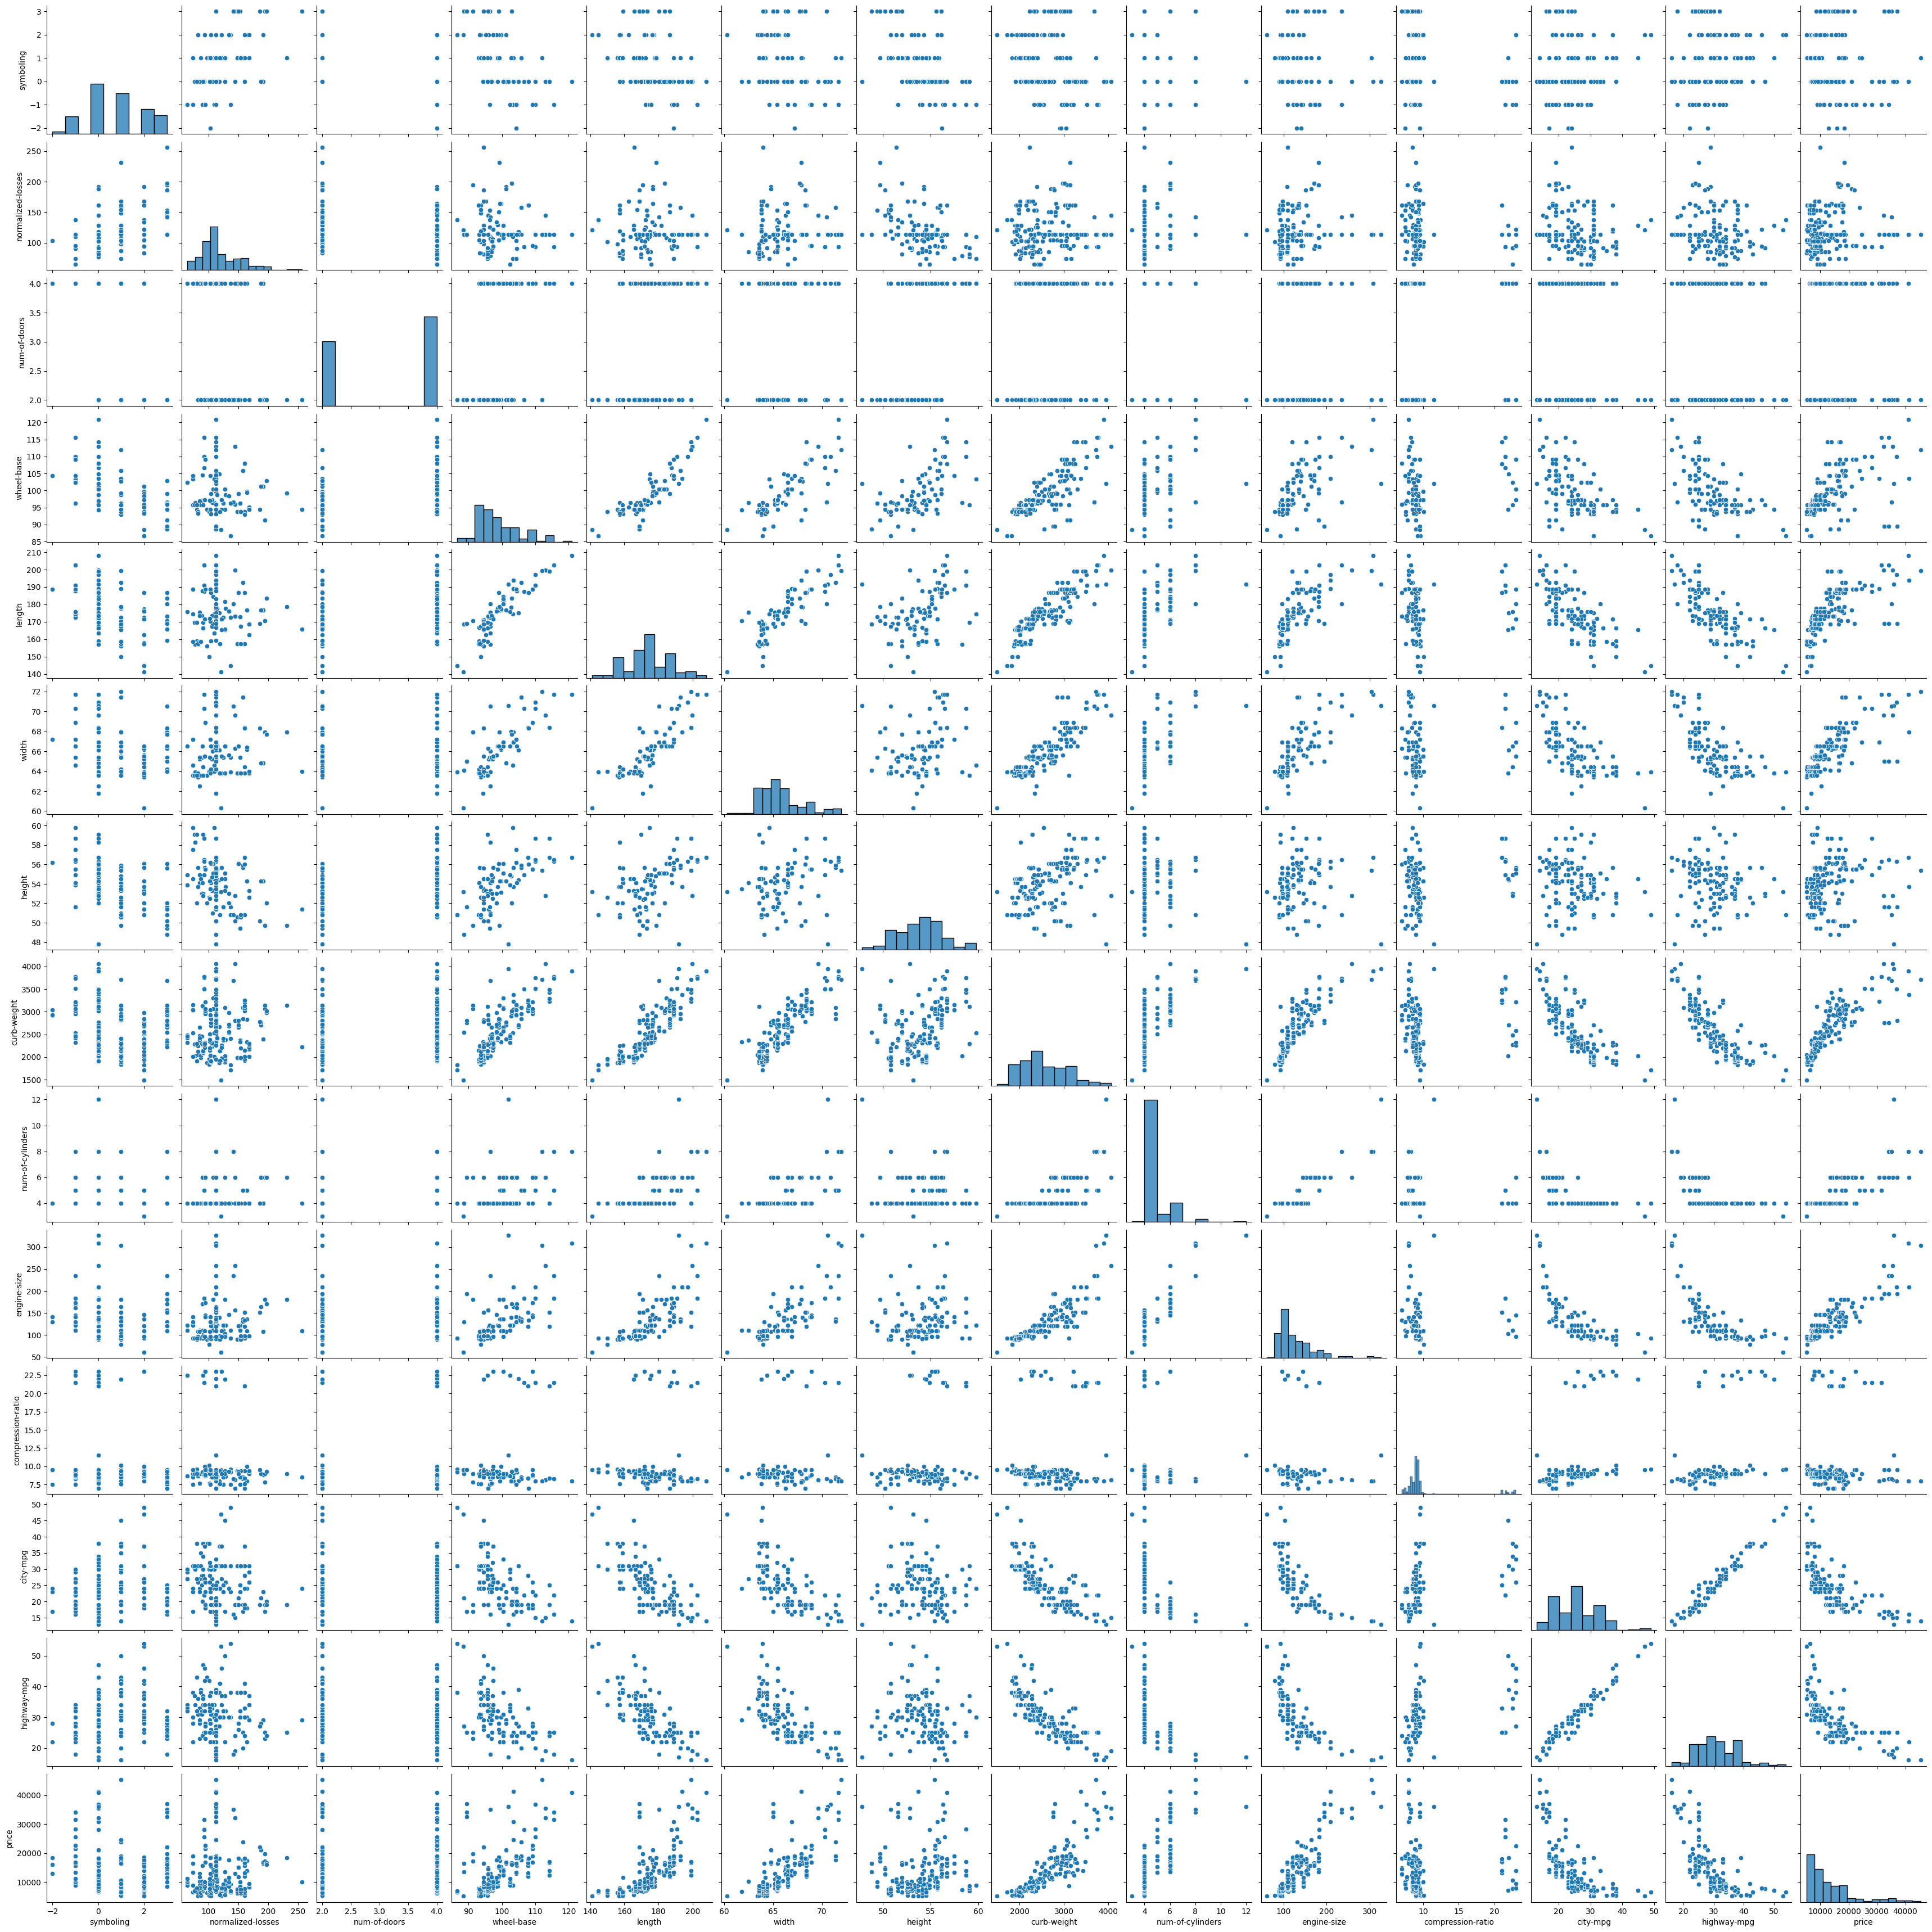

In [21]:
sns.pairplot(df)

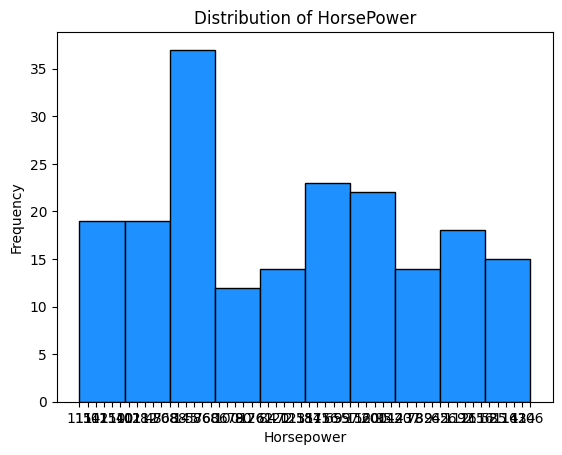

In [22]:
plt.hist(df['horsepower'], bins=10, edgecolor='black', color='dodgerblue') # notice how we are binning data here
plt.title('Distribution of HorsePower')
plt.xlabel('Horsepower')
plt.ylabel('Frequency')
plt.show()

***Observations:***


*   The data doesnt follow any particular trend



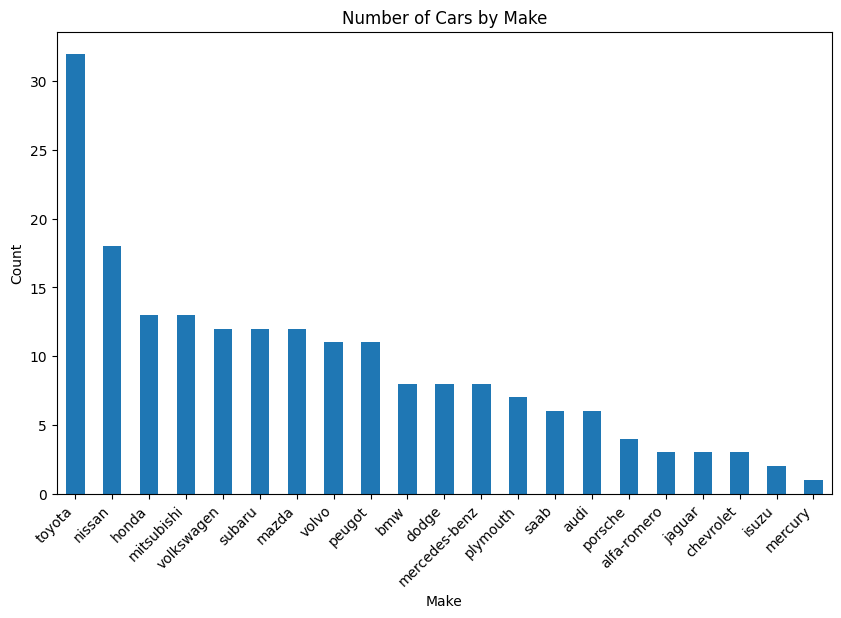

In [23]:
df['make'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title('Number of Cars by Make')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

***Observations:***


*   Maximum number of automobiles are of type Toyota followed by Nissan
*   Honda and Mitsubishi and Volkswagen, Subaru, Mazda have same frequency respectively
*   Least number of cars are of Isuzu and Mercury



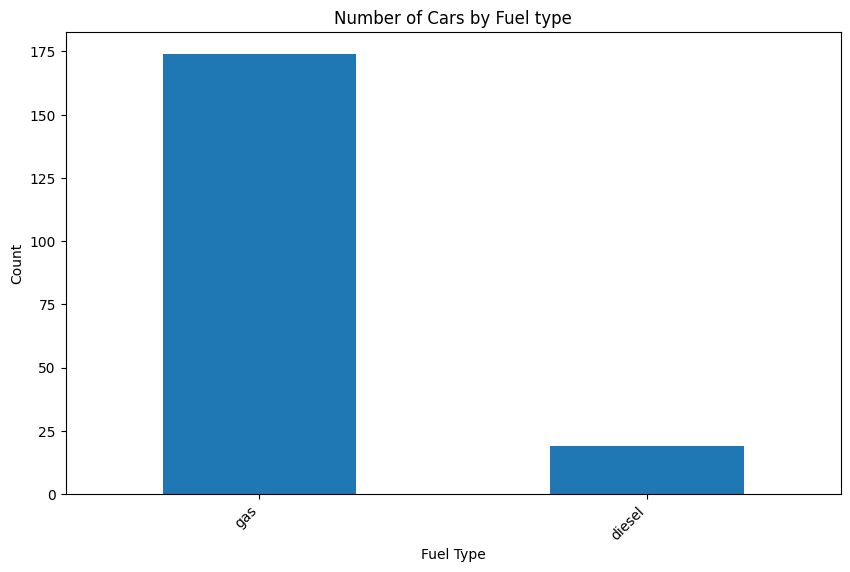

In [24]:
df['fuel-type'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title('Number of Cars by Fuel type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

***Observations:***


*   The number of automobiles having fuel-type as gas is almost 6 times more than that of fuel-type diesel

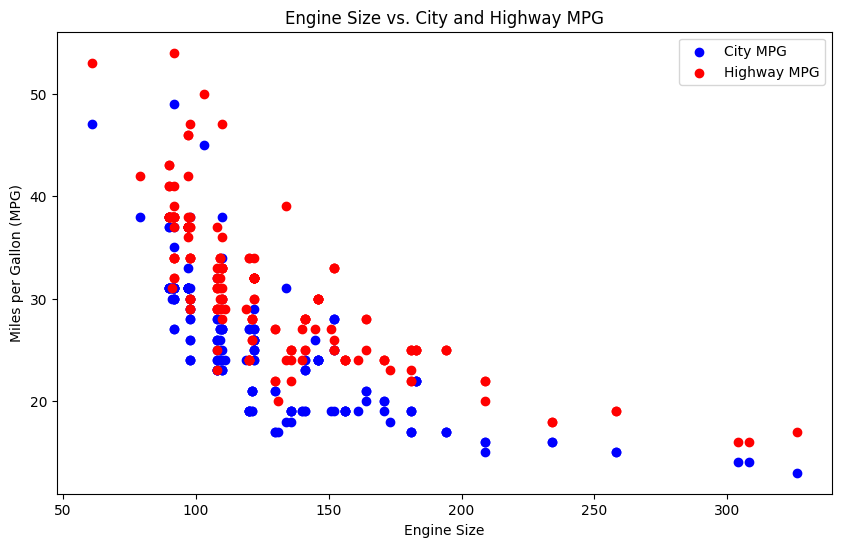

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(df['engine-size'], df['city-mpg'], color='blue', label='City MPG')
plt.scatter(df['engine-size'], df['highway-mpg'], color='red', label='Highway MPG')
plt.xlabel('Engine Size')
plt.ylabel('Miles per Gallon (MPG)')
plt.title('Engine Size vs. City and Highway MPG')
plt.legend()
plt.show()

***Observations:***


*   There is an overall negative correlation between engine size and miles per gallon (MPG)
*   The highway MPG is better and more than the city MPG



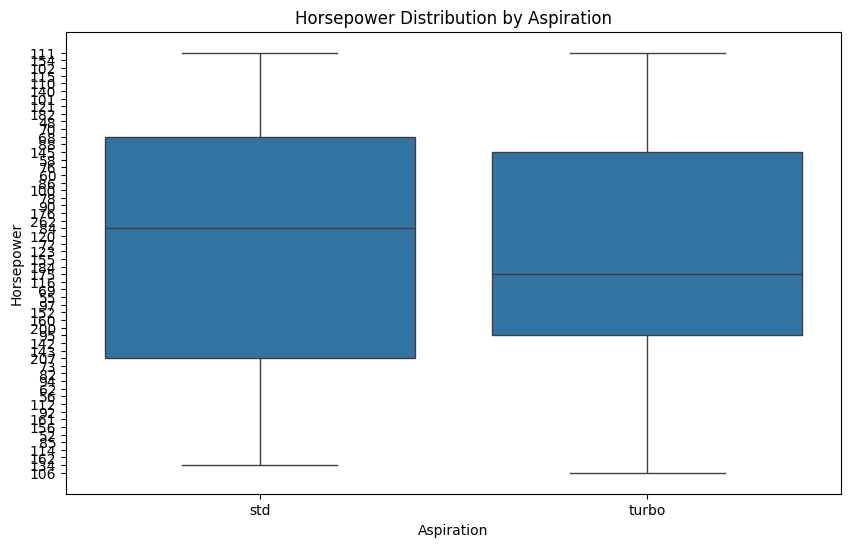

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='aspiration', y='horsepower', data=df)
plt.title('Horsepower Distribution by Aspiration')
plt.xlabel('Aspiration')
plt.ylabel('Horsepower')
plt.show()

***Observations:***


*   The distribution of values is more in std than in turbo

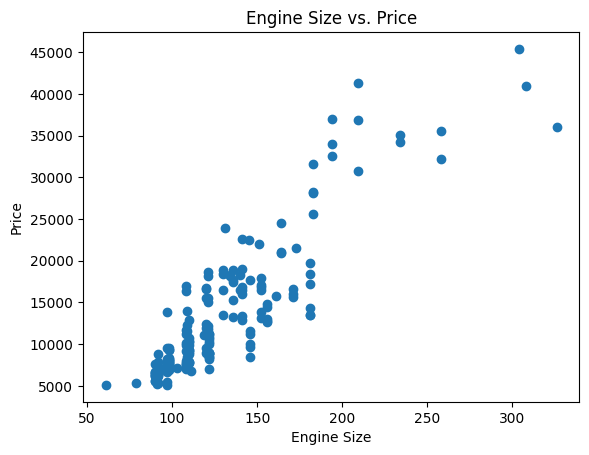

In [27]:
plt.scatter(df['engine-size'], df['price'])
plt.title('Engine Size vs. Price')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

***Observations:***

*   As the size of engine increases, the price of the automobile also increases. There is a strong positive correlation between the two variables.    



We check the shape of the dataset and the different types of datatypes in the dataset

In [28]:
df.shape

(193, 26)

Next, we move on to PCA for which we require all the data to be numerical. So, we convert the categorical columns to numberical using one-hot encoding

In [29]:
df['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [30]:
nominal_make = ['make']
df = pd.get_dummies(df, columns=nominal_make)

In [31]:
df['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [32]:
nominal_aspiration = ['aspiration']
df = pd.get_dummies(df, columns=nominal_aspiration)

In [33]:
df['body-style'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [34]:
nominal_body = ['body-style']
df = pd.get_dummies(df, columns=nominal_body)

In [35]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [36]:
nominal_drive = ['drive-wheels']
df = pd.get_dummies(df, columns=nominal_drive)

In [37]:
df['engine-location'].unique()

array(['front', 'rear'], dtype=object)

In [38]:
nominal_engine = ['engine-location']
df = pd.get_dummies(df, columns=nominal_engine)

In [39]:
df['engine-type'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'ohcf'], dtype=object)

In [40]:
nominal_type = ['engine-type']
df = pd.get_dummies(df, columns=nominal_type)

In [41]:
df['fuel-system'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', 'idi', 'spdi'], dtype=object)

In [42]:
nominal_system = ['fuel-system']
df = pd.get_dummies(df, columns=nominal_system)

In [43]:
df['fuel-type'].unique()

array(['gas', 'diesel'], dtype=object)

In [44]:
nominal_type = ['fuel-type']
df = pd.get_dummies(df, columns=nominal_type)

In [45]:
df.shape

(193, 65)

Now, we check all the columns present in the dataset after encoding

In [46]:
df.columns

Index(['symboling', 'normalized-losses', 'num-of-doors', 'wheel-base',
       'length', 'width', 'height', 'curb-weight', 'num-of-cylinders',
       'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price', 'make_alfa-romero',
       'make_audi', 'make_bmw', 'make_chevrolet', 'make_dodge', 'make_honda',
       'make_isuzu', 'make_jaguar', 'make_mazda', 'make_mercedes-benz',
       'make_mercury', 'make_mitsubishi', 'make_nissan', 'make_peugot',
       'make_plymouth', 'make_porsche', 'make_saab', 'make_subaru',
       'make_toyota', 'make_volkswagen', 'make_volvo', 'aspiration_std',
       'aspiration_turbo', 'body-style_convertible', 'body-style_hardtop',
       'body-style_hatchback', 'body-style_sedan', 'body-style_wagon',
       'drive-wheels_4wd', 'drive-wheels_fwd', 'drive-wheels_rwd',
       'engine-location_front', 'engine-location_rear', 'engine-type_dohc',
       'engine-type_l', 'engine-type_ohc', 'engine-type_

Now, we move to outlier detection in the price column

In [47]:
df_new=df.copy()

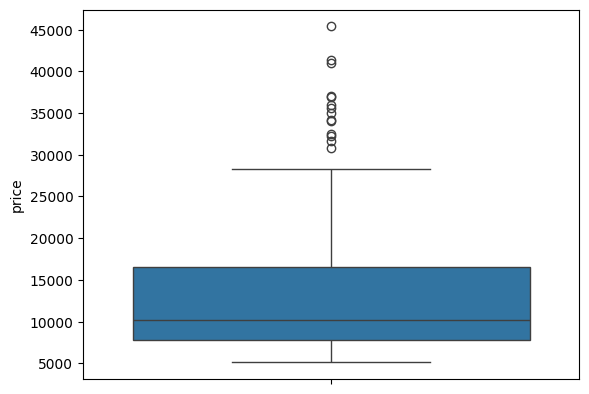

In [48]:
sns.boxplot(df_new['price'])
plt.show()

There are outliers in the dataset, so we decide to clean the dataset removing the outliers

In [49]:
def remove_outliers_iqr(df_new, columns):

    for column in columns:
        Q1 = df_new[column].quantile(0.25)
        Q3 = df_new[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_new = df_new[(df_new[column] >= lower_bound) & (df_new[column] <= upper_bound)]
    return df_new

columns_to_check = ['price']
df_new = remove_outliers_iqr(df_new, columns_to_check)

Now we plot a graph to check if the outliers have been dealt with

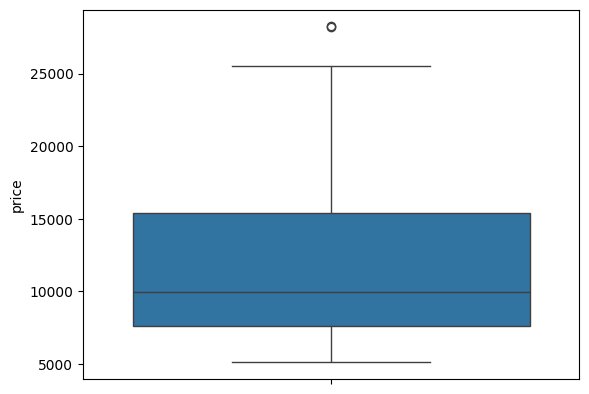

In [50]:
sns.boxplot(df_new['price'],whis=1.5)
plt.show()

In [51]:
feature_columns = df_new.columns[df_new.columns != 'price'] # all columns that are not income
target_column = 'price'

In [52]:
X = df_new[feature_columns]
y = df_new[target_column]

First we start with the PCA technique

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [101]:
df_new.dropna(inplace=True)

df_new = df_new.reset_index()
df_new = df_new.drop('index',axis=1)

pca = PCA(n_components=0.96)
pca.fit(X)
X_reduced = pca.fit_transform(scale(X))

In [102]:
explained_variance = pca.explained_variance_ratio_

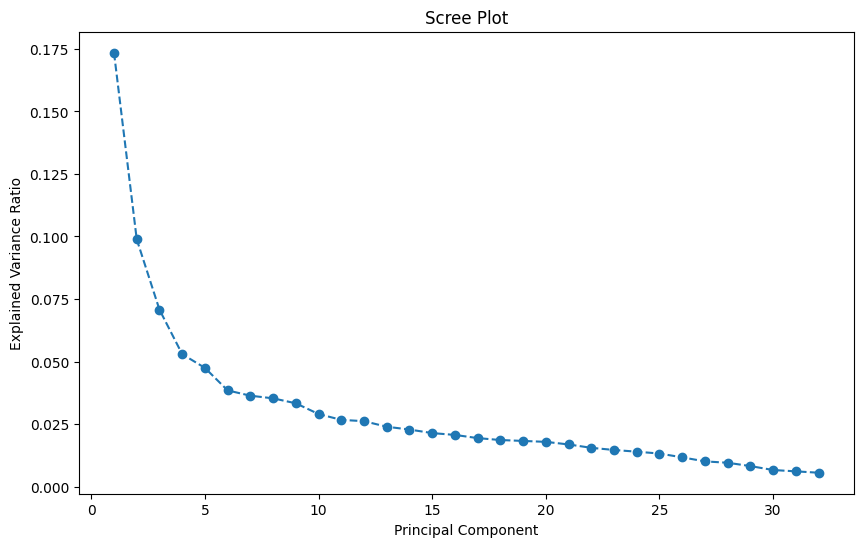

In [103]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

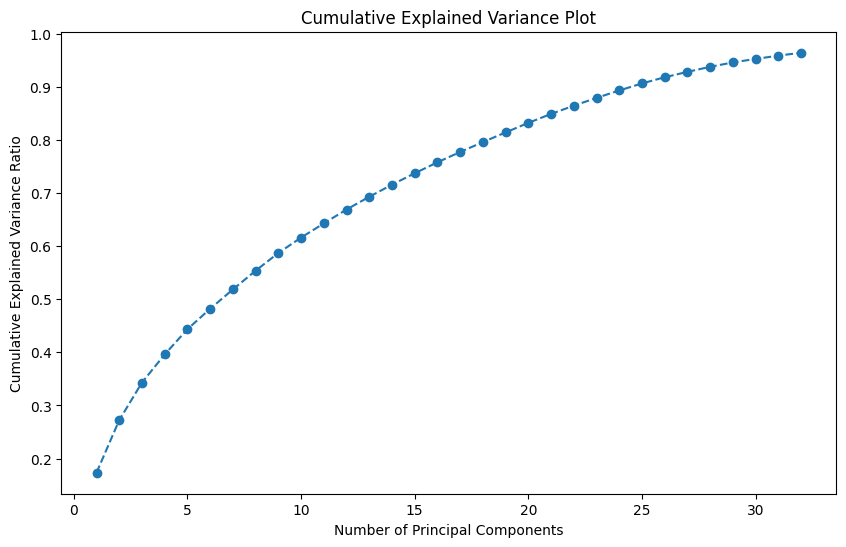

In [104]:
cumulative_explained_variance = np.cumsum(explained_variance)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Plot')
plt.show()

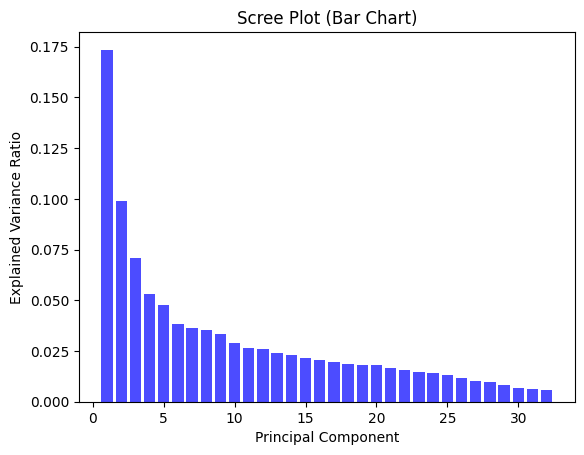

In [105]:
import matplotlib.pyplot as plt

# Number of principal components
num_components = len(explained_variance)

# Create bar chart
plt.bar(range(1, num_components + 1), explained_variance, alpha=0.7, color='blue')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot (Bar Chart)')
plt.show()

In [106]:
desired_variance = 0.90
num_components_to_retain = np.argmax(cumulative_explained_variance >= desired_variance) + 1
print(f'Number of components to retain: {num_components_to_retain}')

Number of components to retain: 25


In [107]:
threshold = 0.05
num_components_above_threshold = np.sum(explained_variance > threshold)
print(f'Number of components above threshold: {num_components_above_threshold}')

Number of components above threshold: 4


In [108]:
principal_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
final_df = pd.concat([principal_df, df_new['price']], axis=1)

In [109]:
final_df.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,price
0,0.454819,-4.449632,-0.548161,3.992429,5.611173,1.449487,-2.276999,1.266119,4.948882,-1.481435,...,-0.845702,1.512560,0.327731,-0.461685,-0.139620,0.871198,0.747111,0.285120,-1.130443,13495.0
1,0.454819,-4.449632,-0.548161,3.992429,5.611173,1.449487,-2.276999,1.266119,4.948882,-1.481435,...,-0.845702,1.512560,0.327731,-0.461685,-0.139620,0.871198,0.747111,0.285120,-1.130443,16500.0
2,1.957056,-4.233332,-1.760401,1.208747,4.072708,-1.438167,-2.681012,-0.030810,-1.672233,-0.934288,...,-1.679038,-1.160010,0.411810,-1.046272,-0.590412,-1.037880,-0.184305,0.059112,-1.620650,16500.0
3,0.033405,-0.973638,-0.062033,-2.490942,-0.457216,-0.230905,-0.302075,-2.197310,1.630365,1.078823,...,-0.945502,0.318991,2.992477,-0.704195,0.566581,0.304275,-0.287982,0.296520,-1.376884,13950.0
4,1.873460,-2.248191,0.874571,-1.556820,-0.721349,-1.137270,-0.952130,-1.524582,1.109084,1.546075,...,-2.189230,-0.064117,3.112293,-1.182921,0.606975,1.460538,-0.735348,-2.485768,-0.820647,17450.0


In [110]:
from sklearn.model_selection import train_test_split

In [111]:
feature_columns = final_df.columns[final_df.columns != 'price'] # all columns that are not income
target_column = 'price'

In [112]:
X_new = final_df[feature_columns]
y_new = final_df[target_column]

In [113]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new, test_size=0.25, random_state=42)

In [114]:
from sklearn.linear_model import LinearRegression

In [118]:
model = LinearRegression()

# Train the model
model.fit(X_new_train, y_new_train)

# Make predictions on the test set
y_pred = model.predict(X_new_test)

# Evaluate the model
mse = mean_squared_error(y_new_test, y_new_pred)
r2 = r2_score(y_new_test, y_new_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 4255658.410604523
R-squared: 0.7759169719757093
